In [26]:
import cv2
import os
import numpy as np
import pandas as pd
import seaborn as sns
from imutils import paths
#from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split



In [ ]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Flatten, Dense


In [20]:
labels = list()
targets = list()
dados = list()
pathImagens = paths.list_images('imagens\db')
for path in pathImagens:
    label = path.split("\\")[2].split("_")[1]
    target = path.split("\\")[2].split("_")[0]
    labels.append(label)
    targets.append(int(target))
    img = cv2.imread(path, 0)
    dados.append(img.flatten())
    

In [21]:
colunas = [f'p{i}' for i in range(1200)]
df = pd.DataFrame(dados, columns = colunas)
df = df / 255.0
df['label'] = labels
df['target'] = targets

In [22]:
df.tail()

,p0,p1,p2,p3,p4,p5,p6,p7,p8,p9,...,p1192,p1193,p1194,p1195,p1196,p1197,p1198,p1199,label,target
1013,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,8,8
1014,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,8,8
1015,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,8,8
1016,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,8,8
1017,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,8,8


In [23]:
df.xs(0).value_counts()

1.0    749
0.0    451
A        1
10       1
Name: 0, dtype: int64

In [24]:
df.to_csv('df_imagens.csv', index=False)

<AxesSubplot: xlabel='target', ylabel='count'>

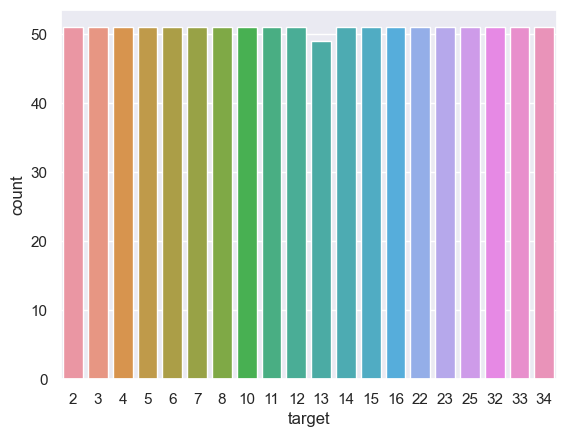

In [25]:
sns.set()
sns.countplot(x="target", data=df)

In [19]:
X_train, X_validation, y_train, y_validation = train_test_split(
    train, test, test_size=0.1, random_state=42)

A    51
B    51
7    51
6    51
5    51
4    51
3    51
Y    51
X    51
W    51
2    51
P    51
N    51
M    51
F    51
E    51
C    51
8    51
D    49
G    43
Name: label, dtype: int64